In [1]:
from src import stock,blsh,support_resistence

In [2]:
symbol = 'NG=F'        #use yahoo symbols
start_date = '2018-12-01'    #start dates for historical data
end_date = '2021-05-17'

In [3]:
buy = stock.Stock(symbol, start_date, end_date)

In [4]:
buy.load_data()

In [5]:
buy.stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-30,4.776,4.473,4.584,4.612,167700.0,4.612
2018-12-03,4.536,4.243,4.527,4.339,190568.0,4.339
2018-12-04,4.574,4.358,4.392,4.457,159868.0,4.457
2018-12-06,4.489,4.271,4.450,4.327,132563.0,4.327
2018-12-07,4.570,4.231,4.348,4.488,182159.0,4.488
...,...,...,...,...,...,...
2021-05-11,2.970,2.881,2.927,2.955,107218.0,2.955
2021-05-12,2.988,2.926,2.953,2.969,90583.0,2.969
2021-05-13,2.998,2.937,2.983,2.973,96118.0,2.973


In [6]:
bhel = support_resistence.supportAndResistence(buy)

In [7]:
bhel.generateSignal()

In [8]:
bhel.signal

,price,sup_tolerance,res_tolerance,sup_count,res_count,sup,res,positions,signal,Positions
Date,,,,,,,,,,
2018-11-30,4.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-03,4.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-04,4.457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-06,4.327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-07,4.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-11,2.955,2.6878,2.8972,NaN,21.0,2.618,2.967,NaN,1.0,0.0
2021-05-12,2.969,2.6882,2.8988,NaN,22.0,2.618,2.969,NaN,1.0,0.0
2021-05-13,2.973,2.7210,2.9100,NaN,23.0,2.658,2.973,NaN,1.0,0.0


In [9]:
bhel.Call()

'Hold'

In [10]:
bhel.mostRecentCall()

Given most recent call on: 2021-04-15 00:00:00


'Buy'

In [11]:
bhel.stock_data.loc['2021-05-05 00:00:00','Adj Close']

2.937999963760376

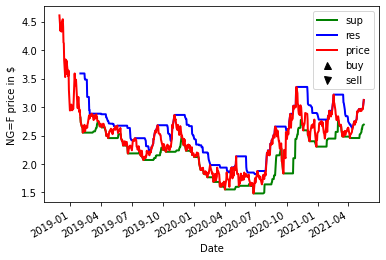

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel=symbol +' price in $')
stock_signal['sup'].plot(ax=ax1, color='g', lw=2.)
stock_signal['res'].plot(ax=ax1, color='b', lw=2.)
stock_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(stock_signal.loc[stock_signal.positions == 1.0].index,
      stock_signal.price[stock_signal.positions == 1.0],
      '^', markersize=7, color='k',label='buy')
ax1.plot(stock_signal.loc[stock_signal.positions == -1.0].index,
      stock_signal.price[stock_signal.positions == -1.0],
      'v', markersize=7, color='k',label='sell')
plt.legend()
plt.show()

In [13]:
stock_signal = bhel.signal